---
# <font color="DarkBlue"><b><center>Redes Neuronales</center></b></font>
---
## <font color="DarkGreen"><center>Tarea 3: Dataset Computer Hardware</font>

**Realizado por:** David Cevallos<br>
**Fecha:** 2023-07-25

**Enlace Google Colab:**
https://colab.research.google.com/drive/1TjaF2EfA5GJzp_5tPnFU9qOMSTCS9lks#scrollTo=KQs9zA4husbB

En esta tarea analizaremos el Dataset Computer Hardware a través de un árbol de regresión.

El dataset se encuentra disponible en: http://archive.ics.uci.edu/dataset/29/computer+hardware, posee 299 observaciones y 9 descriptores.

El laboratorio comprende dos partes. En la primera parte se construye un arbol de regresión considerando a la variable 1 (Vendor name) y descartando a la variable 2 (Model name), pues esta última no posee información de utilidad. En la segunda parte se descartan tanto la variable 1 como la variable 2. La idea principal es corroborar si la variable 1 contribuye al modelo.

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import sklearn.metrics as mt
from sklearn import tree
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Función para asignación de valores numéricos a las
# categorías de la variable 1 (Vendor name)
def corregir(s):
  if s == "adviser":
    return 1
  elif s == "amdahl":
    return 2
  elif s == "apollo":
    return 3
  elif s == "basf":
    return 4
  elif s == "bti":
    return 5
  elif s == "burroughs":
    return 6
  elif s == "c.r.d":
    return 7
  elif s == "cambex":
    return 8
  elif s == "cdc":
    return 9
  elif s == "dec":
    return 10
  elif s == "dg":
    return 11
  elif s == "formation":
    return 12
  elif s == "four-phase":
    return 13
  elif s == "gould":
    return 14
  elif s == "harris":
    return 15
  elif s == "honeywell":
    return 16
  elif s == "hp":
    return 17
  elif s == "ibm":
    return 18
  elif s == "ipl":
    return 19
  elif s == "magnuson":
    return 20
  elif s == "microdata":
    return 21
  elif s == "nas":
    return 22
  elif s == "ncr":
    return 23
  elif s == "nixdorf":
    return 24
  elif s == "perkin-elmer":
    return 25
  elif s == "prime":
    return 26
  elif s == "siemens":
    return 27
  elif s == "sperry":
    return 28
  elif s == "sratus":
    return 29
  elif s == "wang":
    return 30

# Lectura de datos desde el archivo
data = pd.read_csv("/home/machine.data", header=None)

# Obtenemos las 30 categorías de la primera columna
print("Categorías de la primera columna")
print(np.unique(data[0]))

# Se asignan valores numéricos a variable 1 (Vendor name)
data[0] = data[0].map(lambda s: corregir(s))


Categorías de la primera columna
['adviser' 'amdahl' 'apollo' 'basf' 'bti' 'burroughs' 'c.r.d' 'cambex'
 'cdc' 'dec' 'dg' 'formation' 'four-phase' 'gould' 'harris' 'honeywell'
 'hp' 'ibm' 'ipl' 'magnuson' 'microdata' 'nas' 'ncr' 'nixdorf'
 'perkin-elmer' 'prime' 'siemens' 'sperry' 'sratus' 'wang']


In [2]:
# Función para cálculo de MSE medio a través de árbol de regresión
# y estrategia K-folding
# Parámetros:
# X Valores para predicción
# Y Valores de regresión
def calcularMSE(X, Y):
  num_folds = 10
  kfold = KFold(n_splits=num_folds, shuffle=True, random_state=0)
  total_mse = 0;

  for i, (train_index, test_index) in enumerate(kfold.split(X)):
    print("----------------------------------------------------")
    print("Resultados para Fold Nro.",str(i+1))
    print("----------------------------------------------------")
    # Definición y entrenamiento de árbol de regresión
    modelo = tree.DecisionTreeRegressor(criterion="squared_error",
                                        random_state=0,
                                        min_samples_leaf=15
                                        )
    modelo.fit(X[train_index,:], Y[train_index])
    # Obtención de valores predecidos para el fold (iteración)
    Ypred = modelo.predict(X[test_index,:])
    # Obtenemos el valor de MSE para el fold
    fold_mse = mt.mean_squared_error(Y[test_index], Ypred)
    print("Valor MSE = ", fold_mse)
    total_mse = total_mse + fold_mse;

    plt.figure(figsize=(8,4))
    plt.scatter(np.arange(1,len(Y[test_index])+1), Y[test_index], c="blue", marker="o", label="Reales")
    plt.scatter(np.arange(1,len(Ypred)+1), Ypred, c="red", marker="*", label="Predecidos")
    plt.title("Valores reales vs Valores predecidos (Test)")
    plt.legend(loc="best")
    plt.xticks(np.arange(1,len(Ypred)+1))
    plt.grid()
    plt.show()

    plt.figure(figsize=(15,8))
    tree.plot_tree(modelo, fontsize=7)
    plt.show()

  # Error Cuadrático Medio final
  mean_mse = total_mse/num_folds;
  print("----------------------------------------------------")
  print("Error Cuadrático Medio final: ", mean_mse);
  print("----------------------------------------------------")


----------------------------------------------------
Resultados Parte 1
Considerando variable 1 y descartando variable 2
----------------------------------------------------
----------------------------------------------------
Resultados para Fold Nro. 1
----------------------------------------------------
Valor MSE =  3743.6531862307434


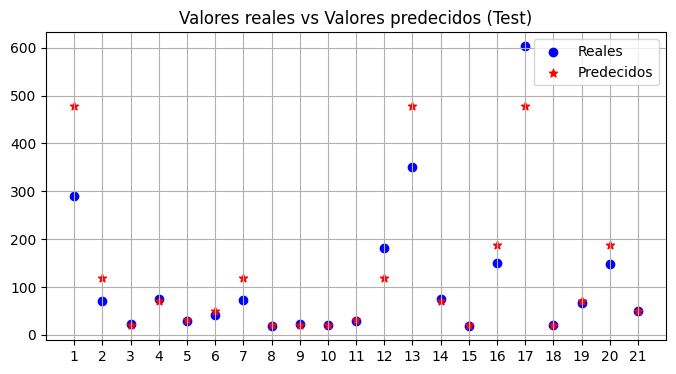

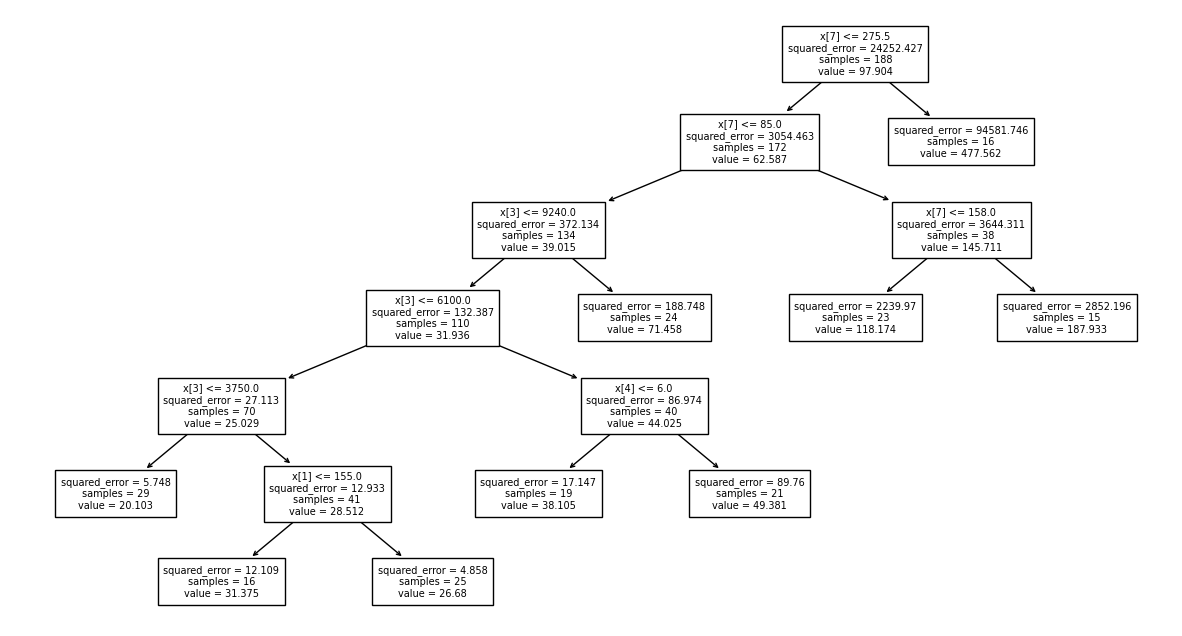

----------------------------------------------------
Resultados para Fold Nro. 2
----------------------------------------------------
Valor MSE =  1097.2532665391157


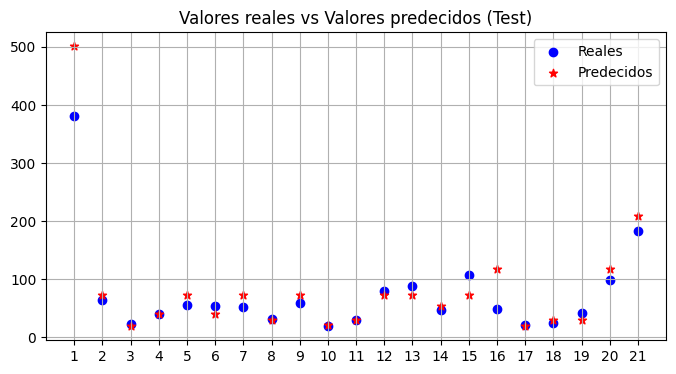

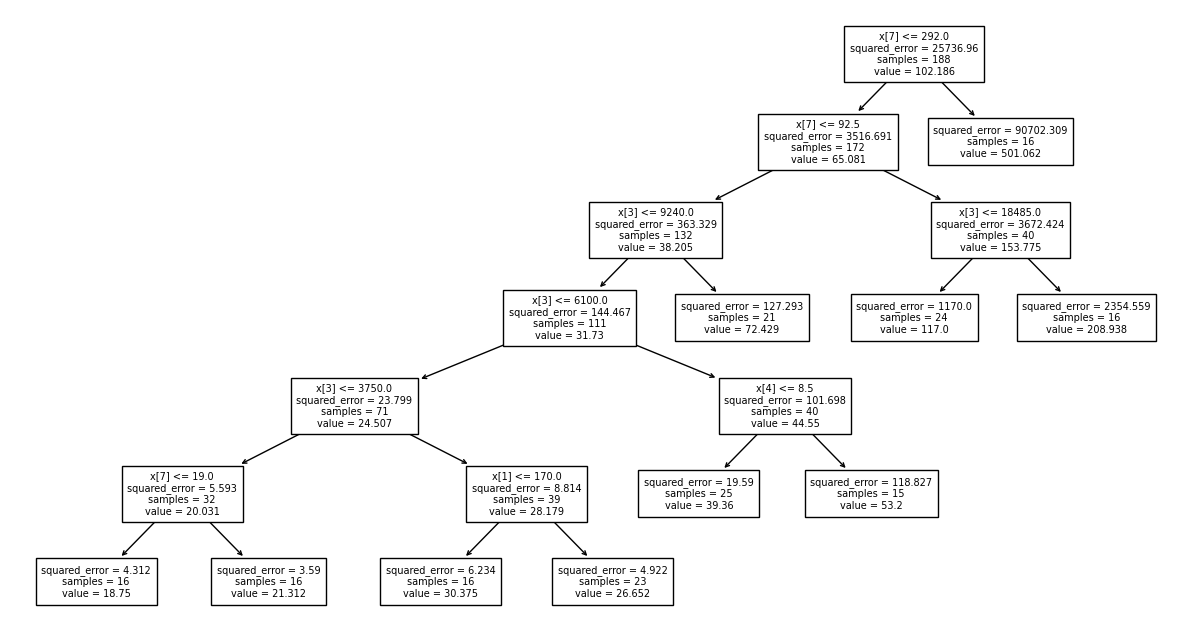

----------------------------------------------------
Resultados para Fold Nro. 3
----------------------------------------------------
Valor MSE =  4505.8823985105555


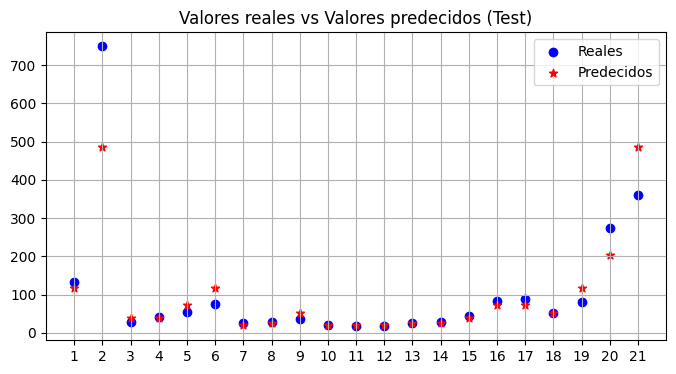

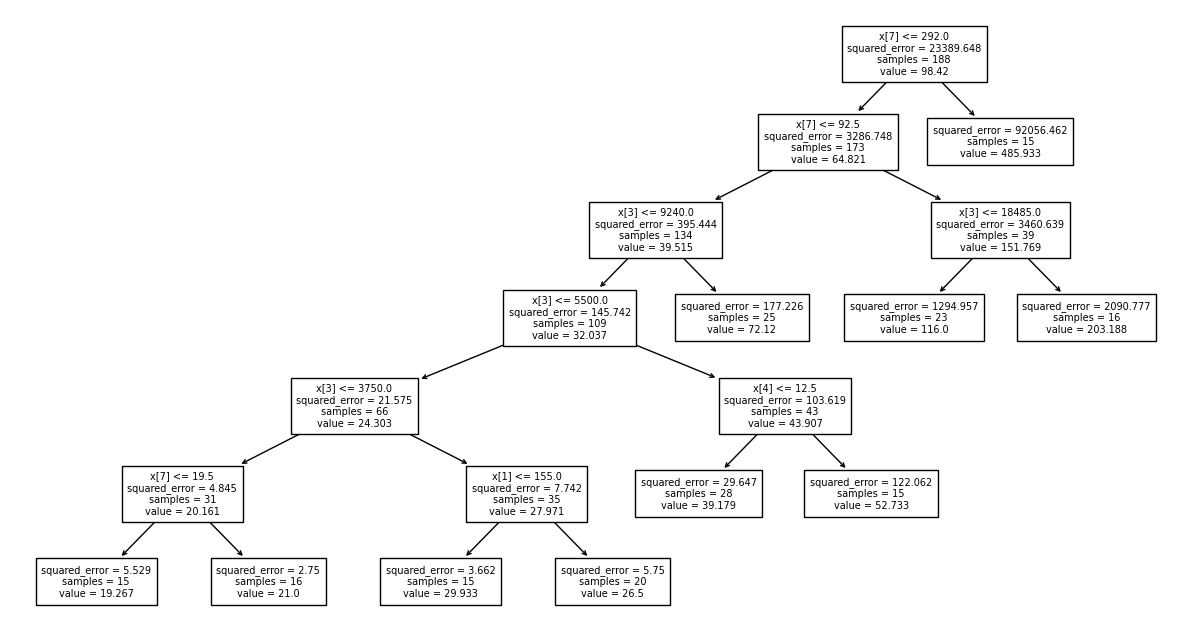

----------------------------------------------------
Resultados para Fold Nro. 4
----------------------------------------------------
Valor MSE =  622.9908761186232


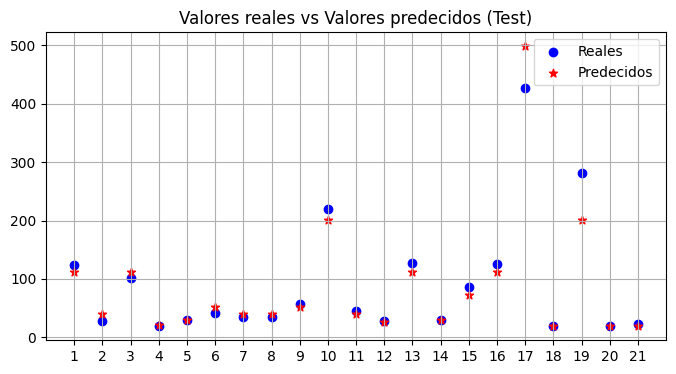

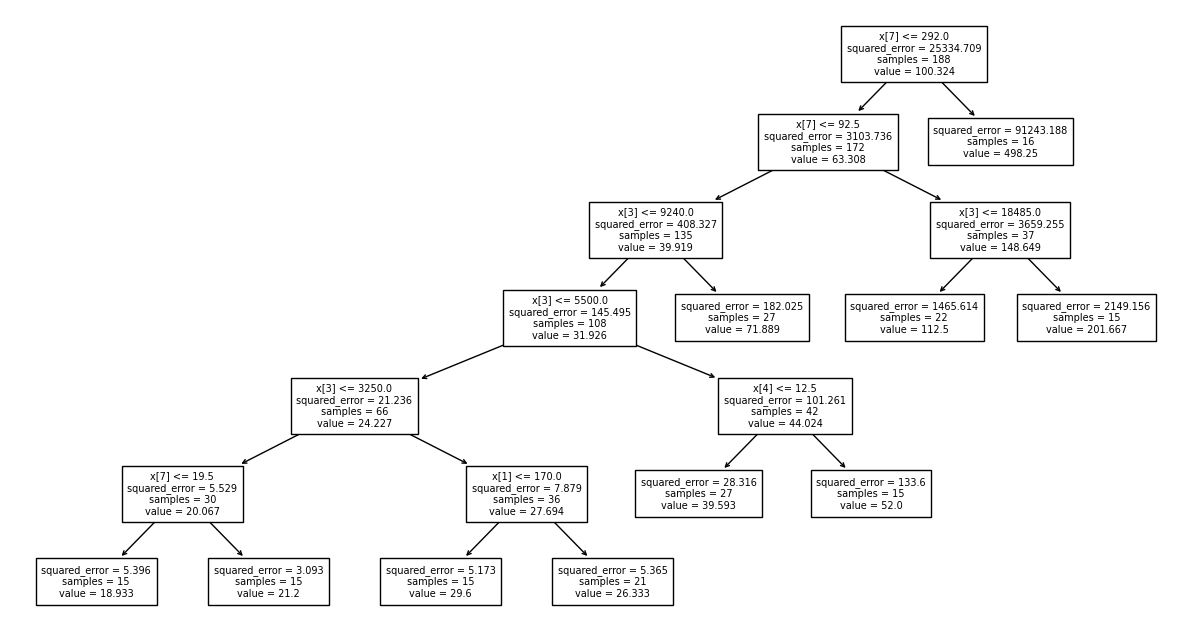

----------------------------------------------------
Resultados para Fold Nro. 5
----------------------------------------------------
Valor MSE =  227.72809329030065


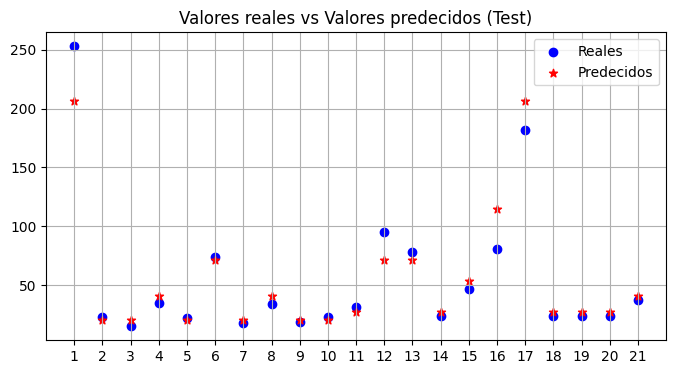

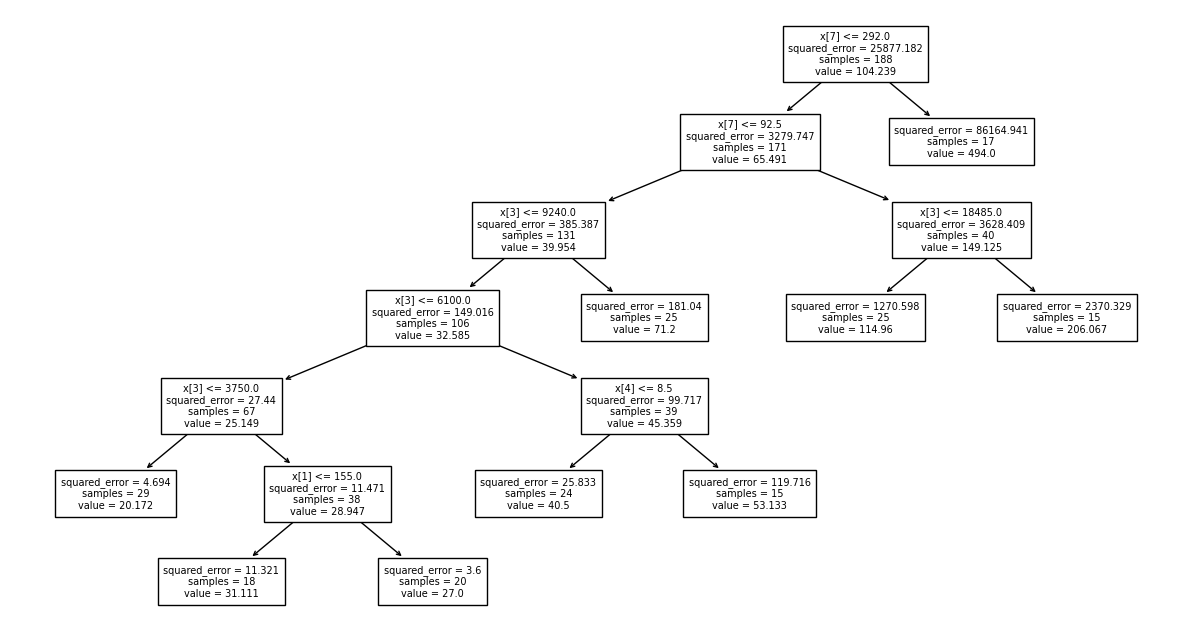

----------------------------------------------------
Resultados para Fold Nro. 6
----------------------------------------------------
Valor MSE =  15925.375730985706


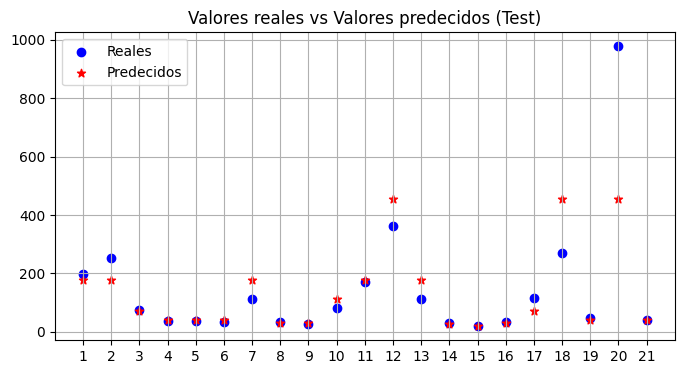

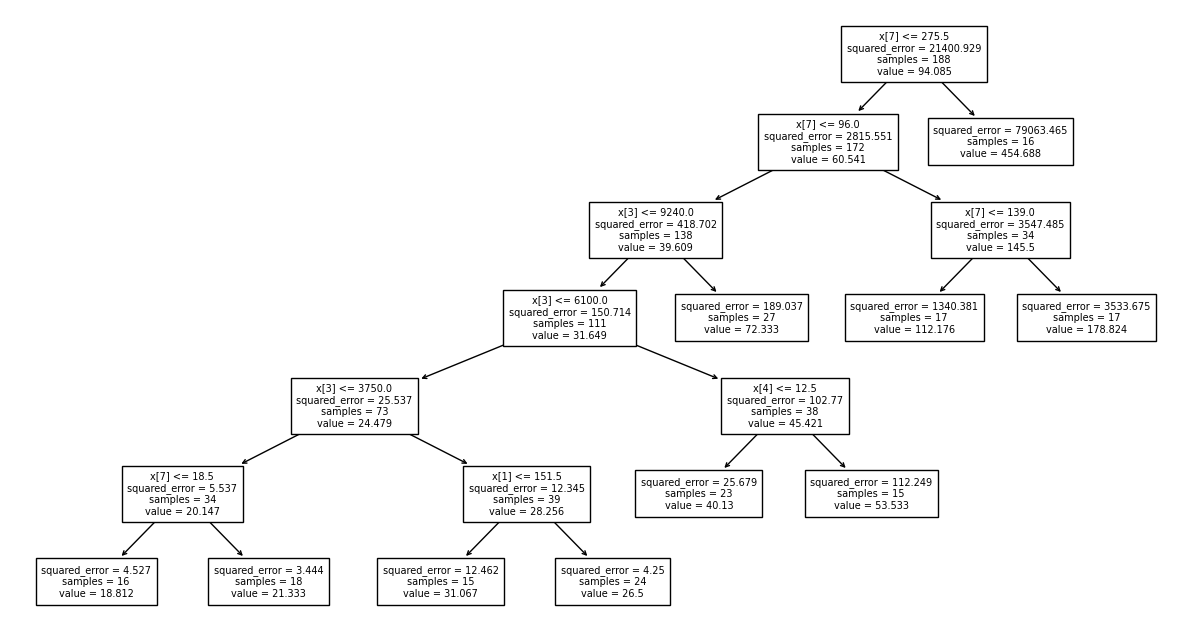

----------------------------------------------------
Resultados para Fold Nro. 7
----------------------------------------------------
Valor MSE =  4530.080376004061


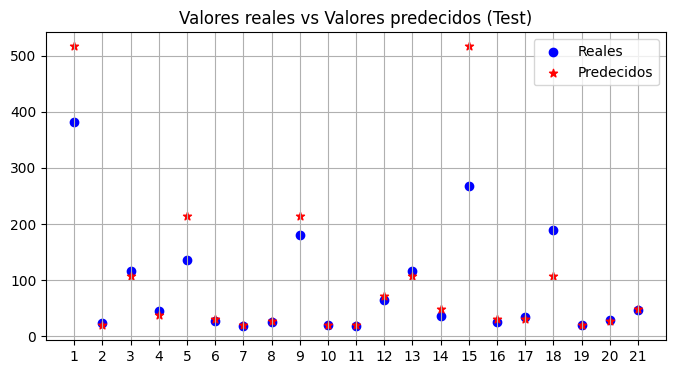

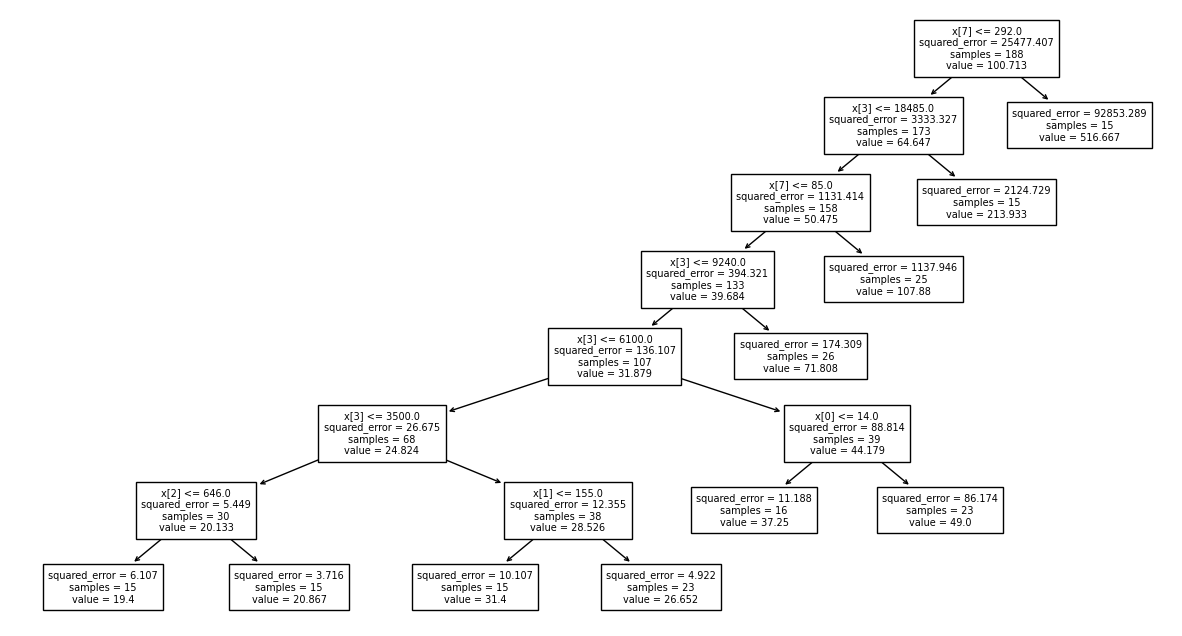

----------------------------------------------------
Resultados para Fold Nro. 8
----------------------------------------------------
Valor MSE =  9173.81939942673


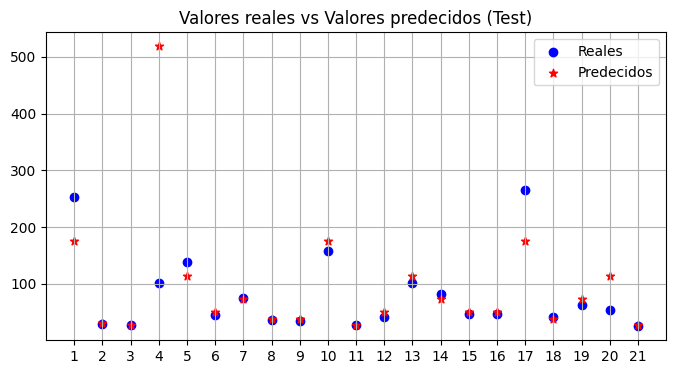

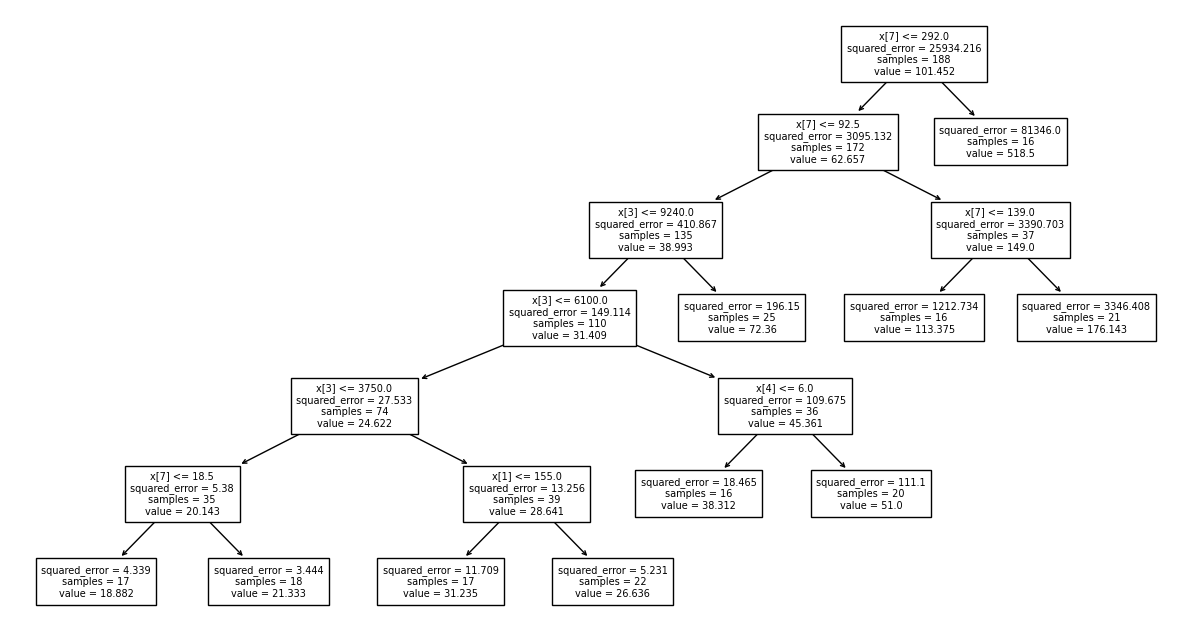

----------------------------------------------------
Resultados para Fold Nro. 9
----------------------------------------------------
Valor MSE =  394.35032104337864


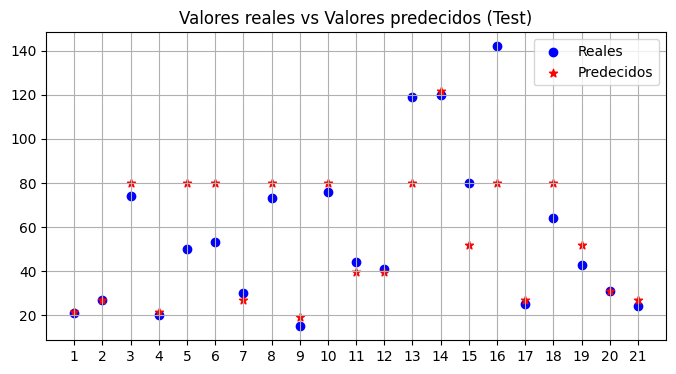

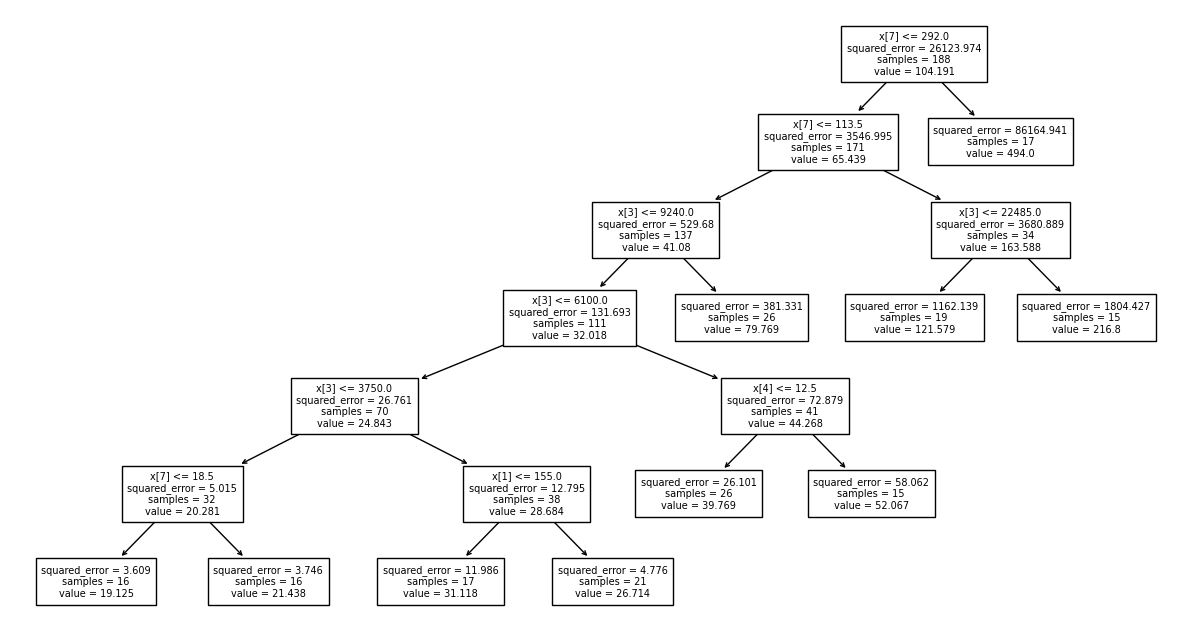

----------------------------------------------------
Resultados para Fold Nro. 10
----------------------------------------------------
Valor MSE =  57263.538602869085


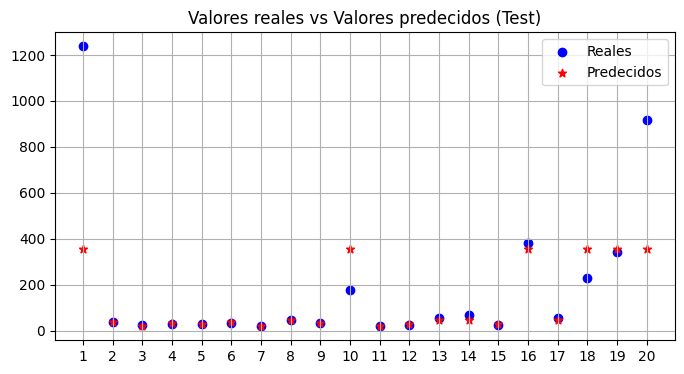

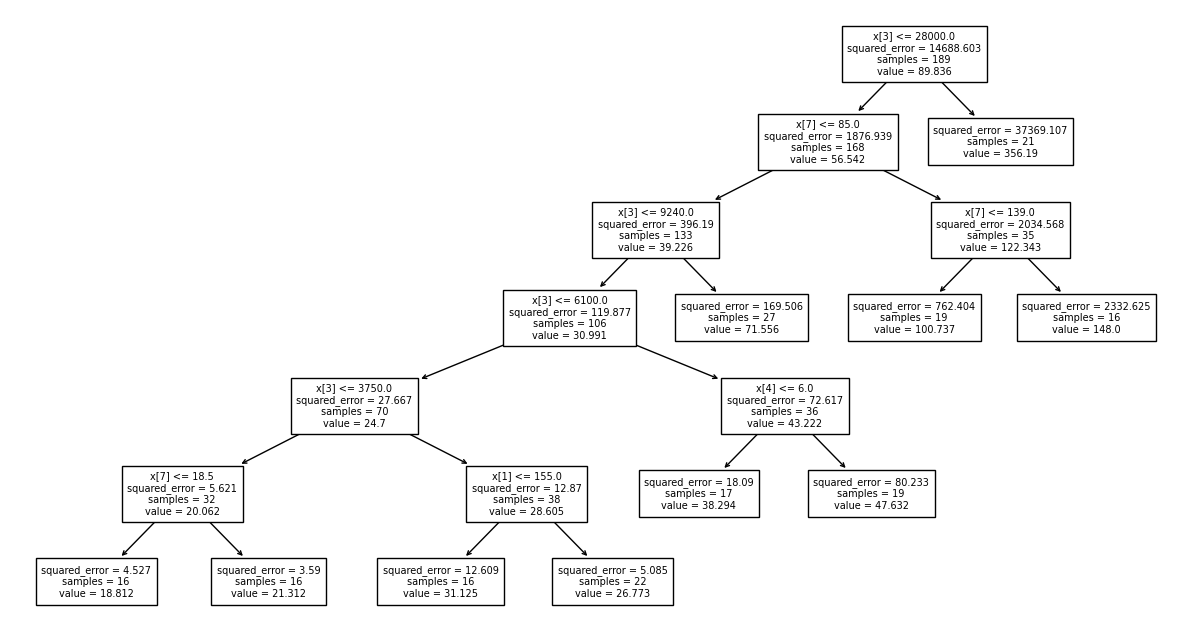

----------------------------------------------------
Error Cuadrático Medio final:  9748.467225101831
----------------------------------------------------


In [3]:
# Parte 1: Árbol de regresión considerando la variable 1 (Vendor name) y
# y descartando la variable 2 (model name)
print("----------------------------------------------------")
print("Resultados Parte 1")
print("Considerando variable 1 y descartando variable 2")
print("----------------------------------------------------")
Y = data[9].to_numpy()
X = data.drop(columns=[1,9]).to_numpy()
calcularMSE(X,Y)

----------------------------------------------------
Resultados Parte 2
Descartando la variable 1 y la variable 2
----------------------------------------------------
----------------------------------------------------
Resultados para Fold Nro. 1
----------------------------------------------------
Valor MSE =  3743.6531862307434


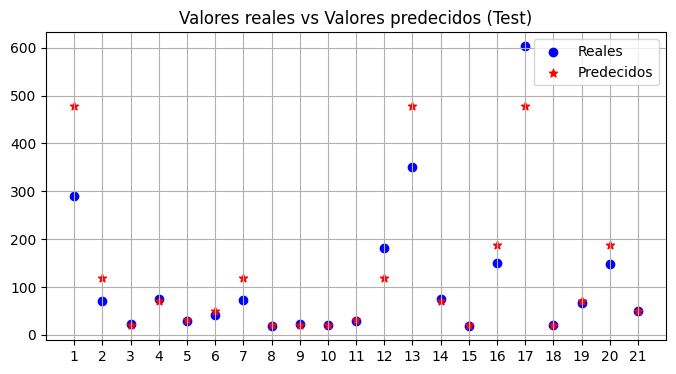

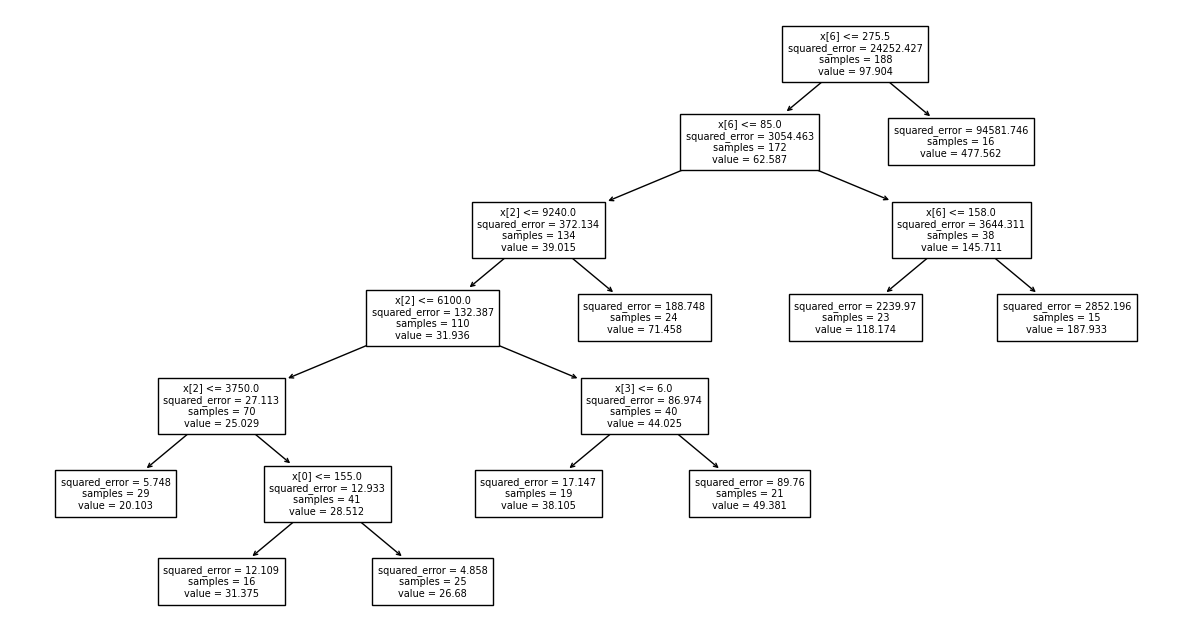

----------------------------------------------------
Resultados para Fold Nro. 2
----------------------------------------------------
Valor MSE =  1097.2532665391157


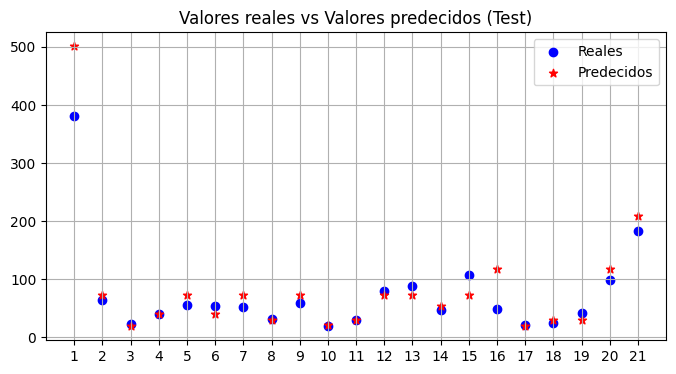

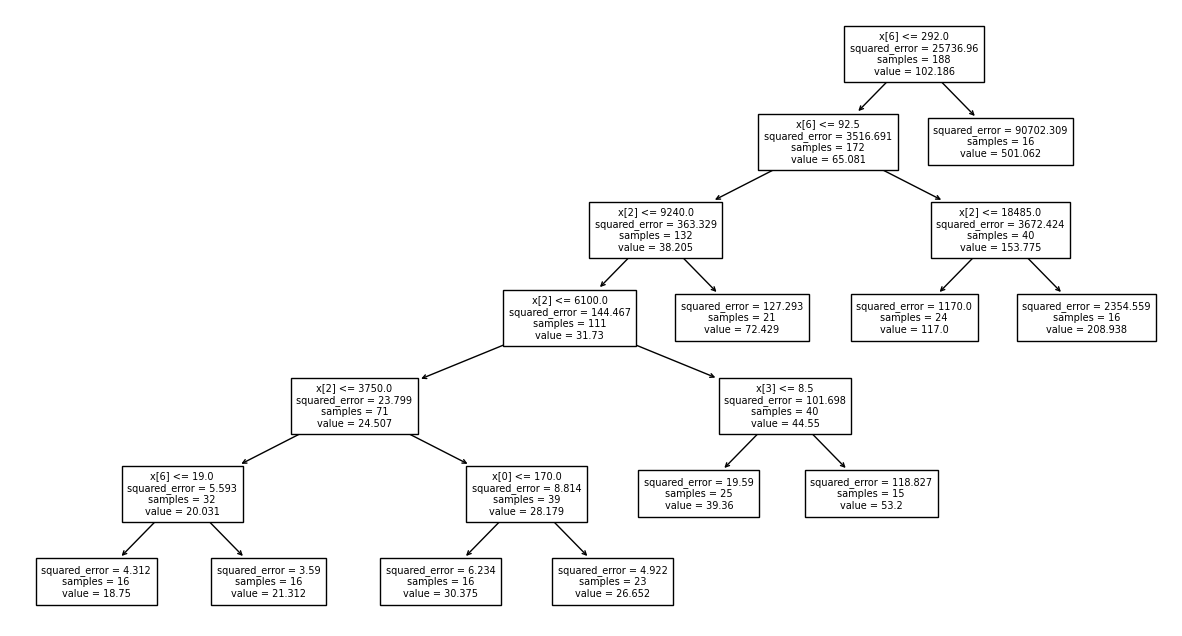

----------------------------------------------------
Resultados para Fold Nro. 3
----------------------------------------------------
Valor MSE =  4505.8823985105555


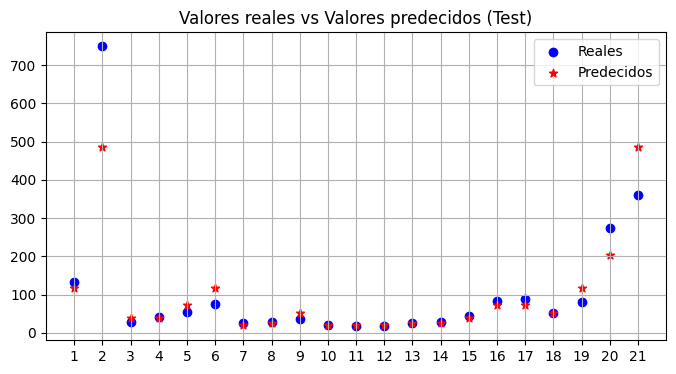

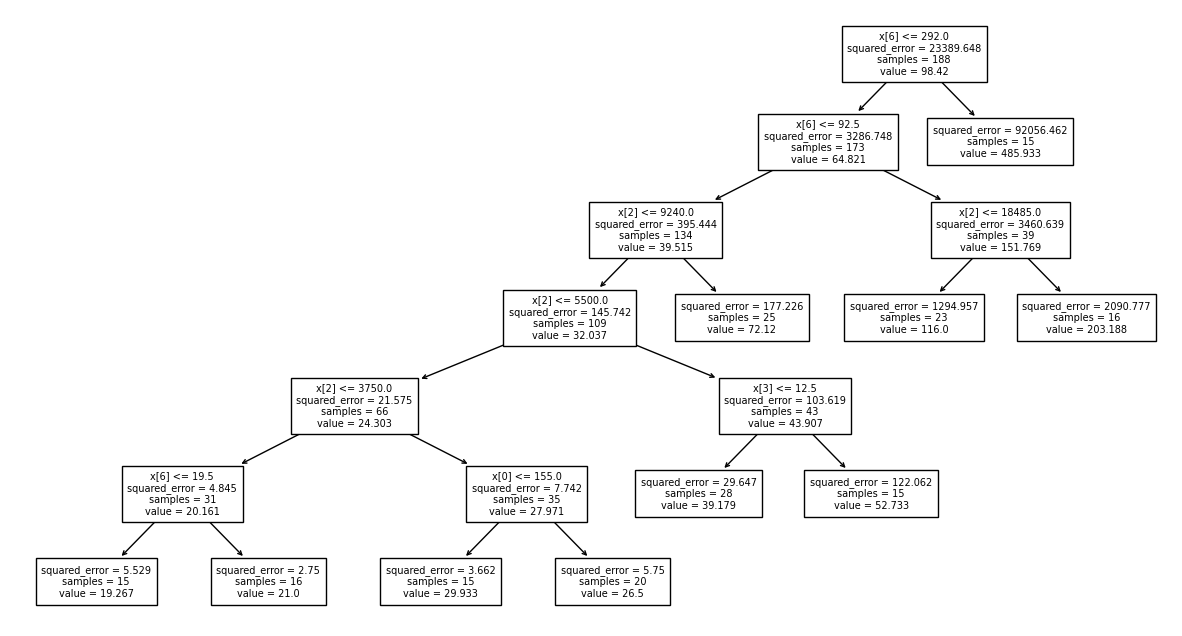

----------------------------------------------------
Resultados para Fold Nro. 4
----------------------------------------------------
Valor MSE =  622.9908761186232


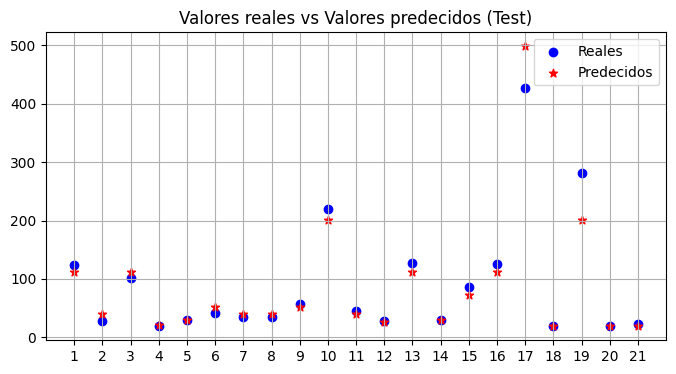

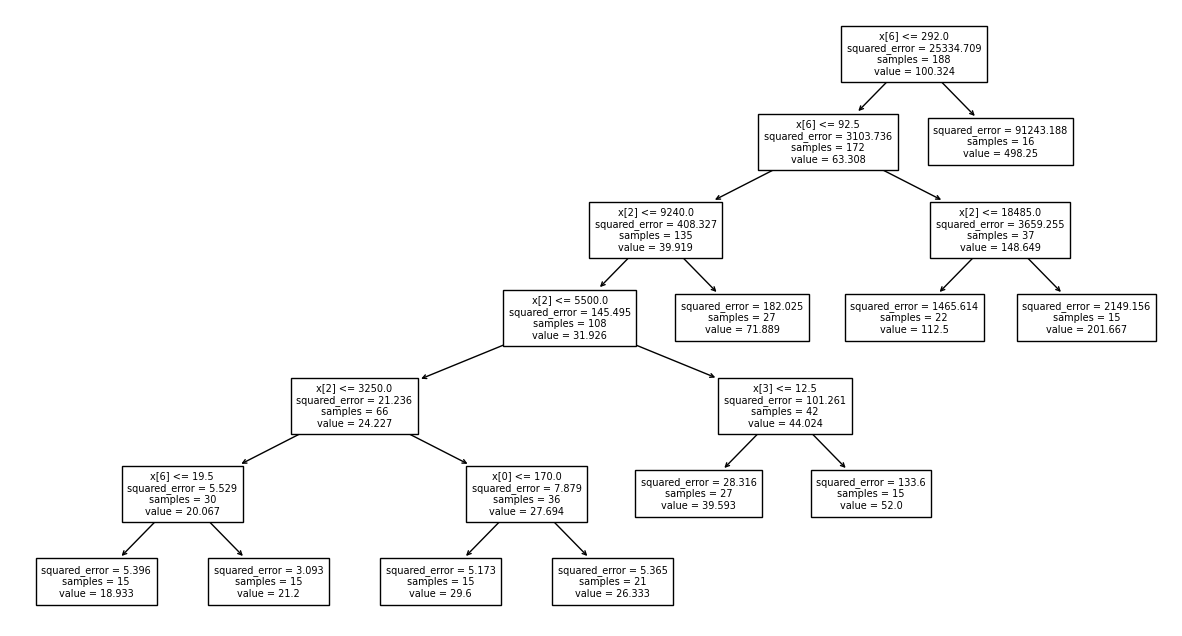

----------------------------------------------------
Resultados para Fold Nro. 5
----------------------------------------------------
Valor MSE =  227.72809329030065


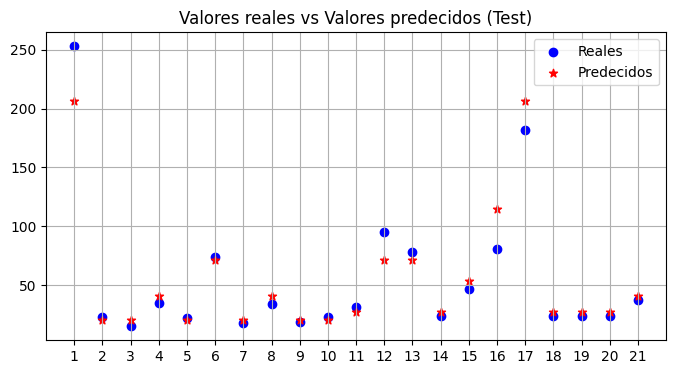

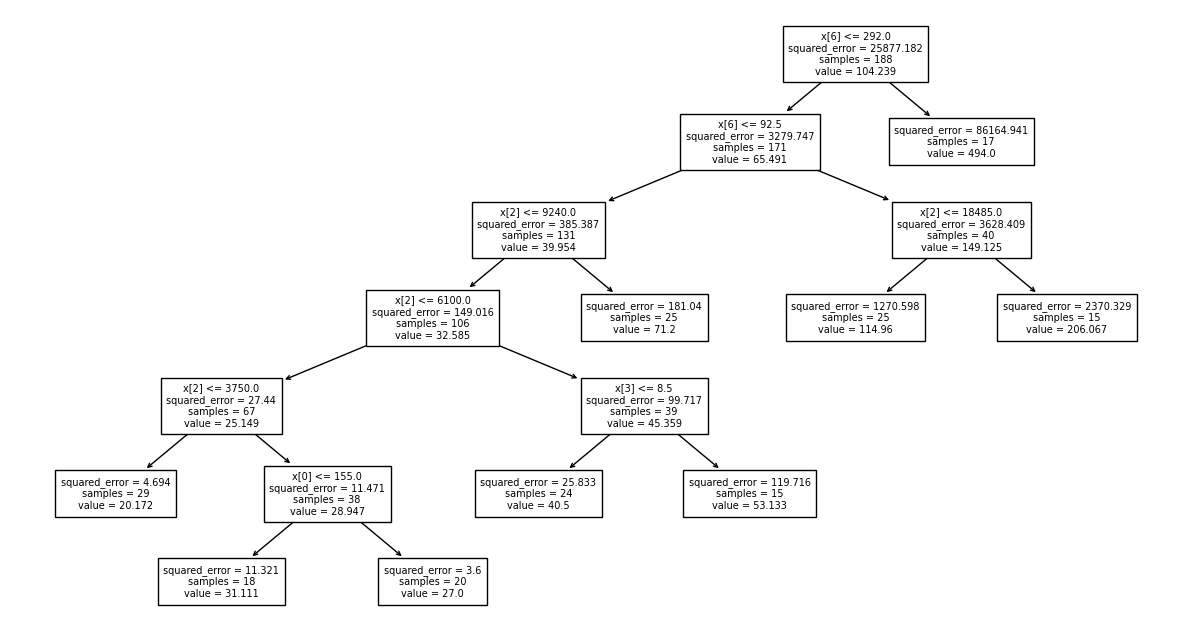

----------------------------------------------------
Resultados para Fold Nro. 6
----------------------------------------------------
Valor MSE =  15925.375730985706


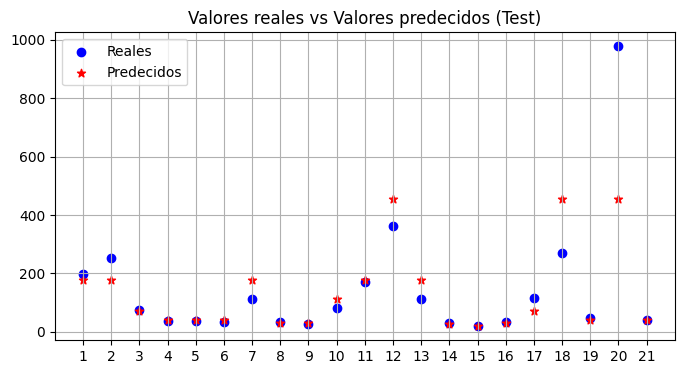

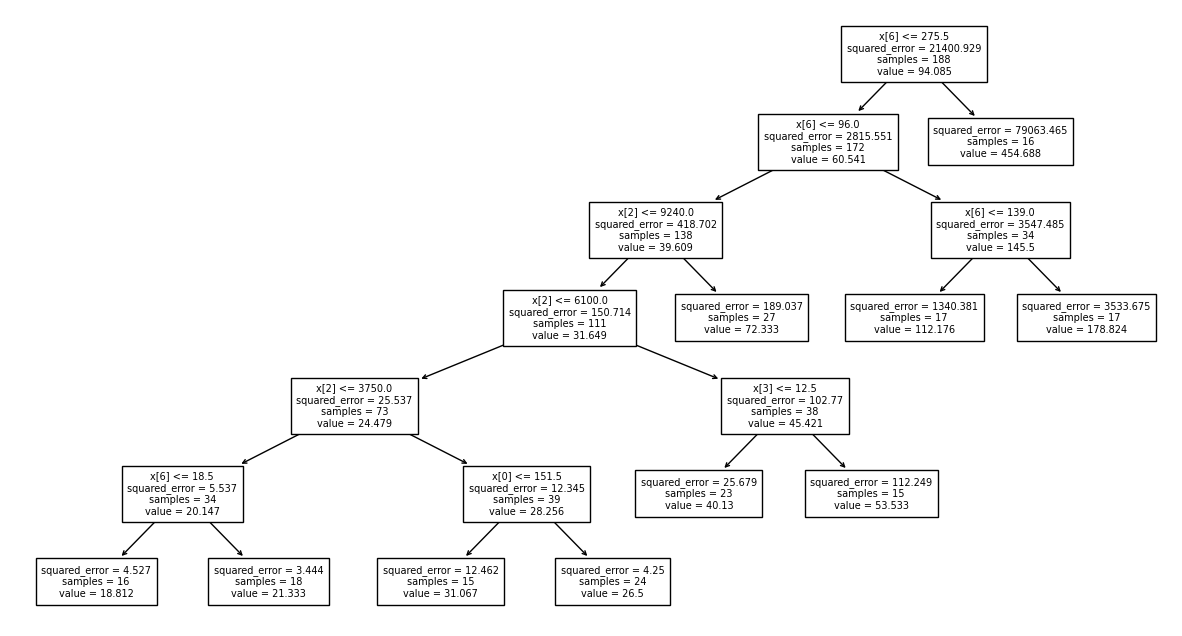

----------------------------------------------------
Resultados para Fold Nro. 7
----------------------------------------------------
Valor MSE =  4522.91065246321


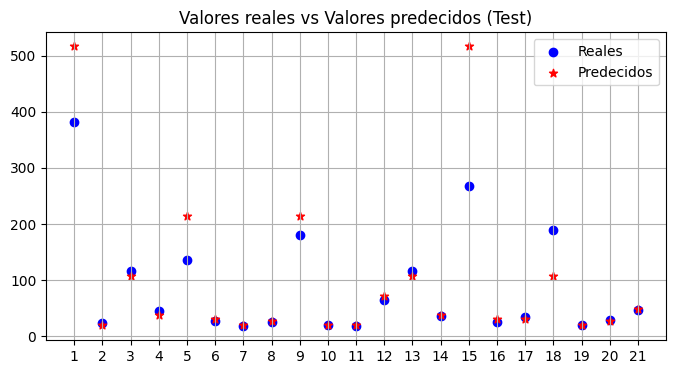

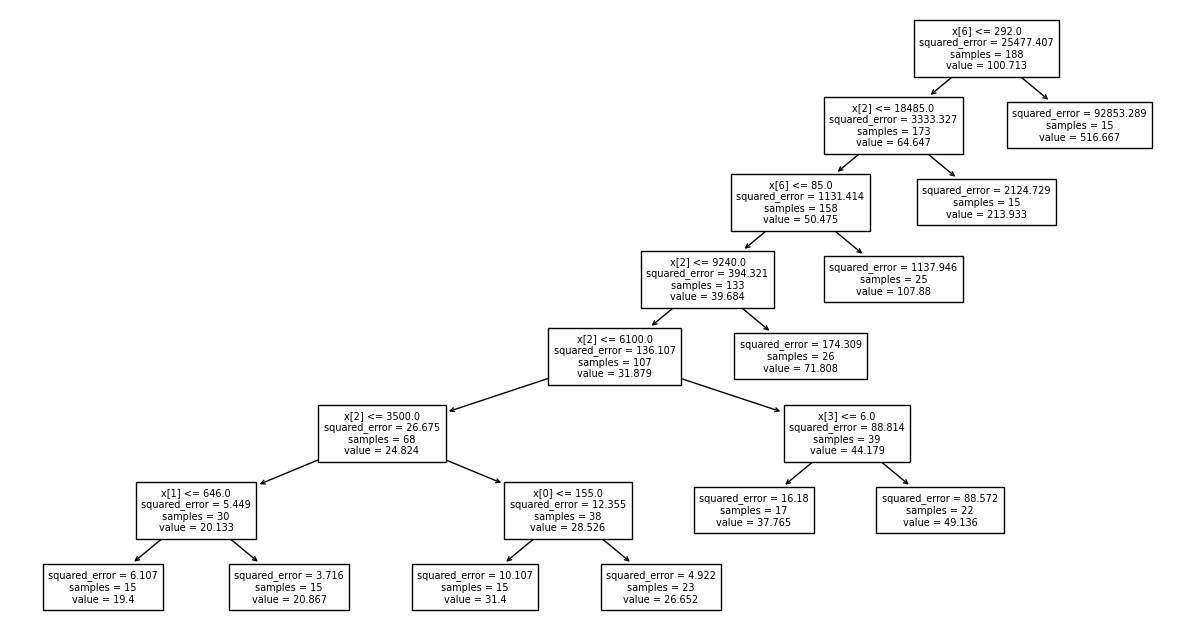

----------------------------------------------------
Resultados para Fold Nro. 8
----------------------------------------------------
Valor MSE =  9173.81939942673


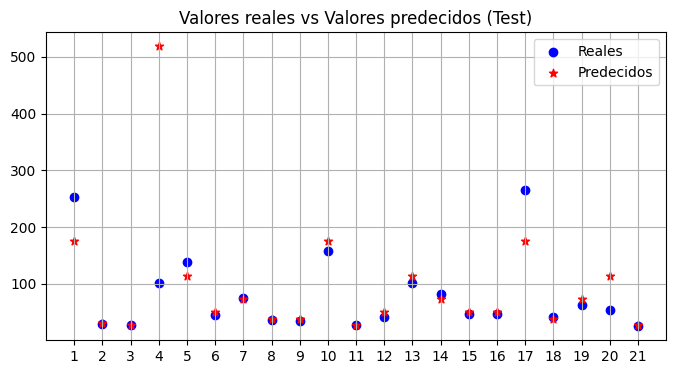

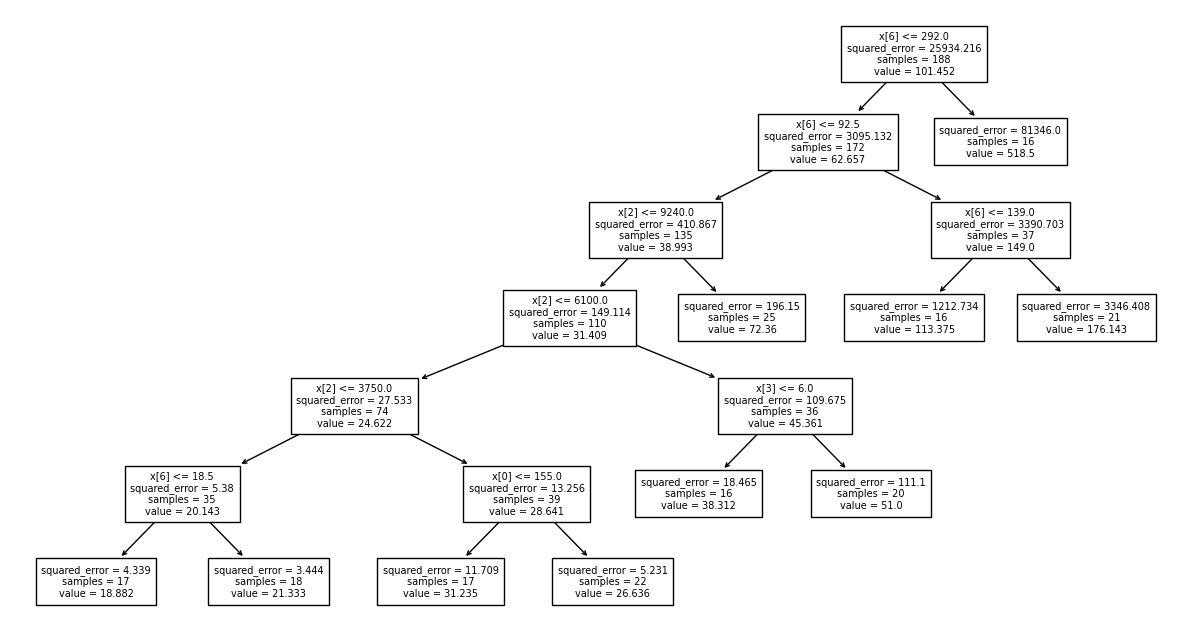

----------------------------------------------------
Resultados para Fold Nro. 9
----------------------------------------------------
Valor MSE =  394.35032104337864


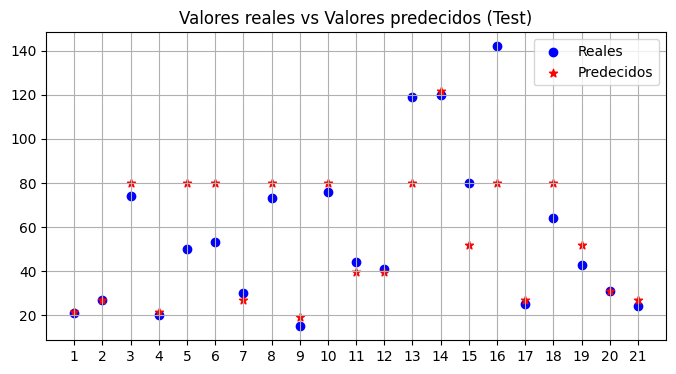

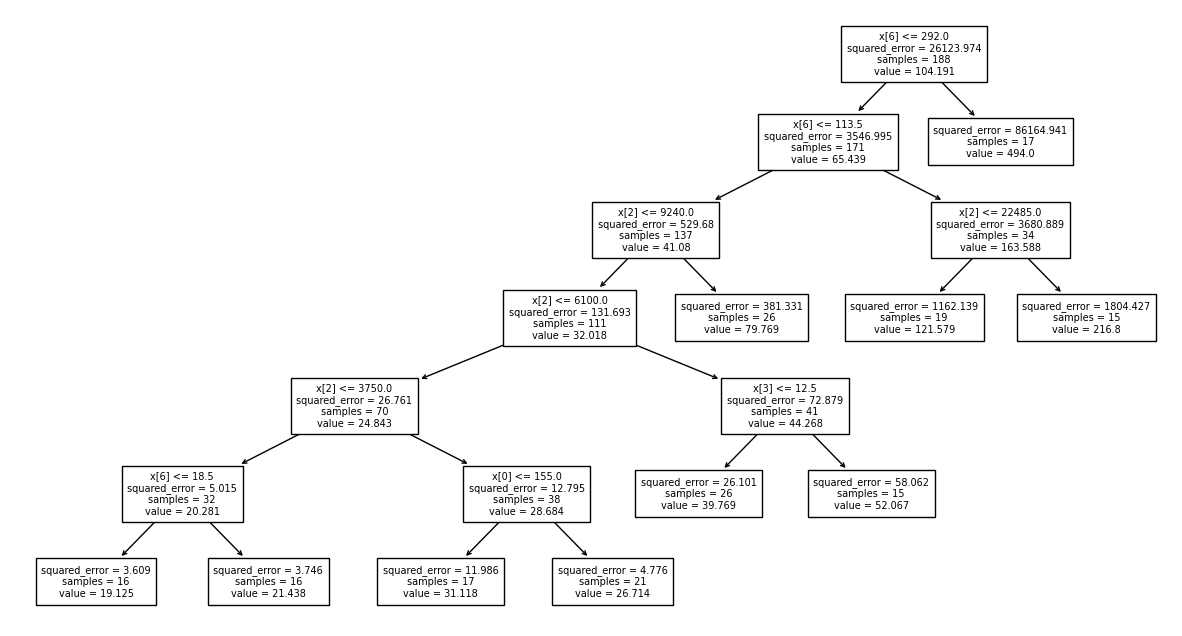

----------------------------------------------------
Resultados para Fold Nro. 10
----------------------------------------------------
Valor MSE =  57263.538602869085


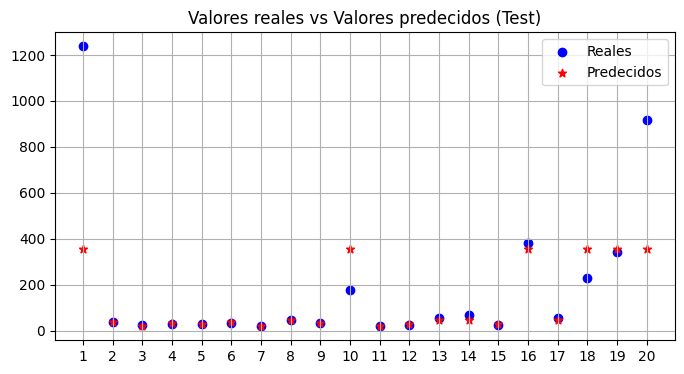

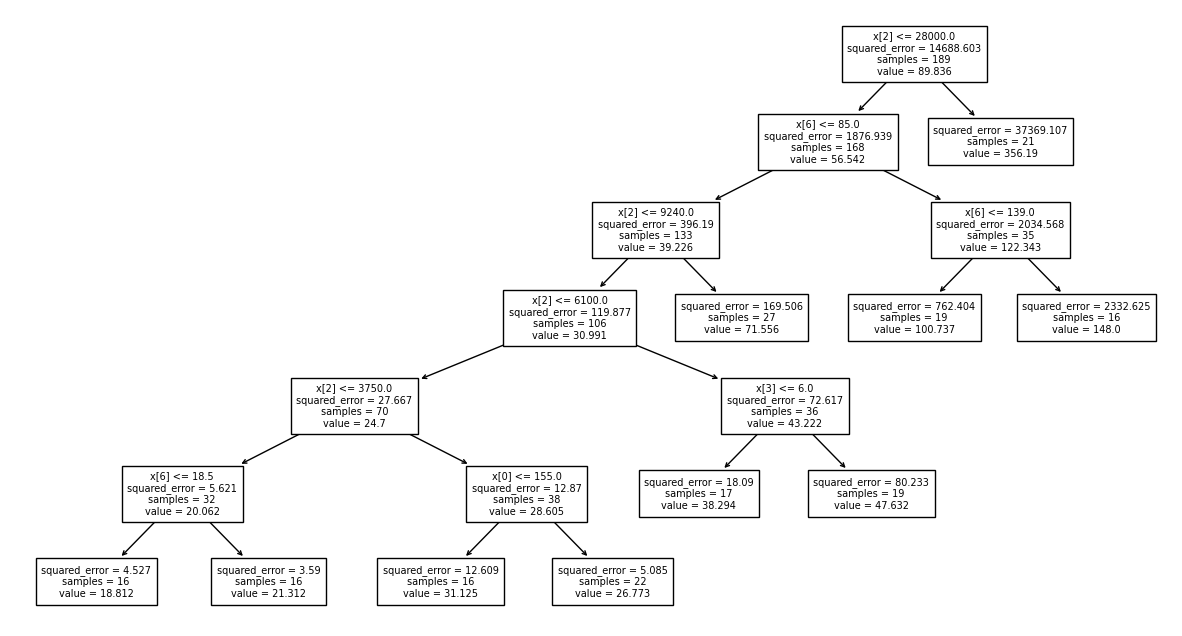

----------------------------------------------------
Error Cuadrático Medio final:  9747.750252747745
----------------------------------------------------


In [4]:
# Parte 2: Árbol de regresión descartando la variable 1 (Vendor name) y
# la variable 2 (model name)
print("----------------------------------------------------")
print("Resultados Parte 2")
print("Descartando la variable 1 y la variable 2")
print("----------------------------------------------------")
X = data.drop(columns=[0,1,9]).to_numpy()
calcularMSE(X,Y)

**Conclusión**

Se puede concluir que la variable número 1 correspondiente al nombre del vendedor (Vendor name) no tiene mayor importancia en el modelo del árbol de regresión porque el valor de MSE medio obtenido con el modelo haciendo uso de la variable fue de 9.748,4672 mientras que el del modelo sin hacer uso de la variable fue de 9.747,7503; es decir prácticamente el mismo.
Además, en los diagramas del árbol de decisión se puede verificar que la variable 1 prácticamente no es empleada y si se la emplea usualmente se analiza en los últimos niveles del árbol de regresión.

Sin embargo, es importante notar que esto podría no ser cierto si el modelo **no considerase** un límite para la estructuración del árbol de regresión como, por ejemplo, el mínimo número de hojas o la profundidad del árbol.